In [1]:
import geojson
import netCDF4 as nc
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder = r'p:\11205479-coclico\data\18_AR5_SLP_IPCC'
dataset = 'total-ens-slr-26-5.nc'
dataset = 'total-ens-slr-45-5.nc'
dataset = 'total-ens-slr-85-5.nc'

In [3]:
ds = nc.Dataset(os.path.join(folder, dataset))
print(ds)
#ds['totslr']

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: version 5, 27-March-2014
    contact: mark.carson@zmaw.de
    references: IPCC AR5 WGI, Chapter 13, and Chapter 13: Supplementary Material; www.climatechange2013.org
    dimensions(sizes): ens(21), str16(16), time(94), lat(180), lon(360), bnds(2)
    variables(dimensions): float64 time(time), float64 time_bnds(time, bnds), float64 lat(lat), float64 lon(lon), float32 totslr_ens(ens, time, lat, lon), float32 totslr(time, lat, lon), float32 loerr(time, lat, lon), float32 hierr(time, lat, lon), |S1 modelname(ens, str16)
    groups: 


In [5]:
# get minima and maxima for the colormap boundaries
print(np.nanmin(ds['totslr'][-1,:,:].flatten()), np.nanmax(ds['totslr'][-1,:,:].flatten()))

-1.852379 1.1297567


C:\Users\kras\AppData\Local\Temp/ipykernel_11632/1826086882.py:2: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  print(np.nanmin(ds['totslr'][-1,:,:].flatten()), np.nanmax(ds['totslr'][-1,:,:].flatten()))


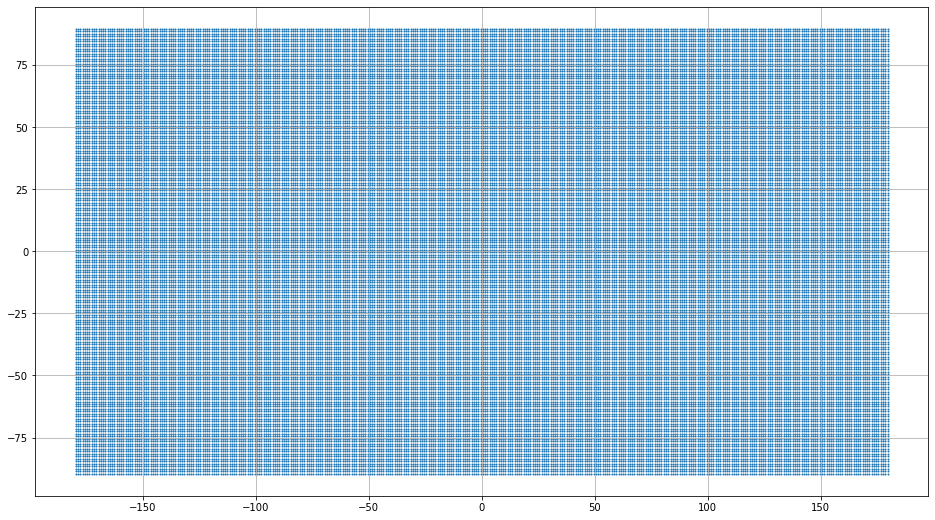

In [6]:
lons, lats = np.meshgrid(ds['lon'][:], ds['lat'][:])

plt.figure(figsize=(16,9))
plt.scatter(lons.flatten()-180, lats.flatten(), s=1)
#plt.scatter(ds['longitude'][2000:2100], ds['latitude'][2000:2100], s=1, c='r')
#plt.xlim(-10,50)
#plt.ylim(25,75)
plt.grid()

#plt.savefig(os.path.join(folder, 'overview_data_type.png'), bbox_inches='tight')